In [490]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# An example of a violin plot



In [492]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[1], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

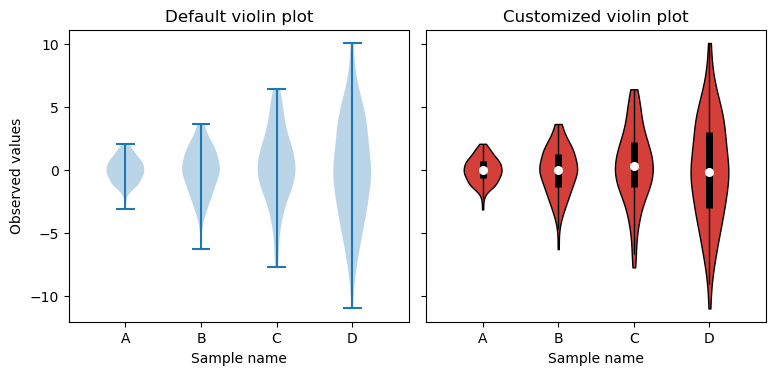

In [493]:
# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

# Assignment
## Latency Tests Online Gaming Active Measurements
### Sorting RSRP, RSRQ and SINR by DateTime using one campaign


In [495]:
import pandas as pd
import numpy as np

# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping
pd.set_option('future.no_silent_downcasting', True)

# reading CSV file
latency_5g = pd.read_csv('Data/Latency_Tests-Online_Gaming-Active_Measurements.csv', low_memory=False)
print(list(latency_5g.columns)) # output headers

['Date', 'Time', 'GPS Long', 'GPS Lat', '5G  PCI', 'LTE PCI', 'SS-RSRP', 'SS-RSRQ', 'SS-SINR', 'RSRP', 'RSRQ', 'SINR', 'RAT Info', '5G PDSCH Throughput', 'LTE PDSCH Throughput', '5G  PUSCH Throughput', 'LTE PUSCH Throughput', '5G  PDSCH QPSK Rate', '5G  PDSCH 16QAM Rate', '5G  PDSCH 64QAM Rate', '5G  PDSCH 256QAM Rate', 'LTE PDSCH QPSK Rate', 'LTE PDSCH 16QAM Rate', 'LTE PDSCH 64QAM Rate', 'LTE PDSCH 256QAM Rate', '5G  PUSCH QPSK Rate', '5G  PUSCH 16QAM Rate', '5G  PUSCH 64QAM Rate', '5G  PUSCH 256QAM Rate', 'LTE PUSCH QPSK Rate', 'LTE PUSCH 16QAM Rate', 'LTE PUSCH 64QAM Rate', '5G Min PDSCH MCS', '5G Avg PDSCH MCS', '5G Max PDSCH MCS', 'LTE DL MCS Level', '5G Min PUSCH MCS', '5G Avg PUSCH MCS', '5G Max PUSCH MCS', 'LTE UL MCS Level', '5G Serving SSB Index', '5G # Beams', '5G Min Num PDSCH RB', '5G Avg Num PDSCH RB', '5G Max Num PDSCH RB', 'LTE PDSCH RB Min', 'LTE PDSCH RB Max', 'LTE PDSCH RB Average', '5G Min Num PUSCH RB', '5G Avg Num PUSCH RB', '5G Max Num PUSCH RB', 'LTE PUSCH RB M

In [496]:
# filter data by campaign
all_campaign_data = latency_5g[latency_5g['Campaign'] == 'Gaming_Campaign_15'].copy() # you can change campaign

# check date time format
print(all_campaign_data[['Date', 'Time']].head())

# convert time and date
all_campaign_data.loc[:,'DateTime'] = pd.to_datetime(
    all_campaign_data['Date'] + ' ' + all_campaign_data['Time'], 
    format='%d.%m.%Y %H:%M:%S.%f',
    errors='coerce'
)

# select only the columns of interest and DateTime - You can add more columns
columns_of_interest = ['DateTime', 'RSRP', 'RSRQ', 'SINR', 'UE Mode', 'Scenario']
campaign_data = all_campaign_data[columns_of_interest]

# sort data by datetime
campaign_data_sorted = campaign_data.sort_values(by='DateTime')

# replace ? with NaN to mark missing values (really just duplicates)
campaign_data_sorted.replace('?', np.nan, inplace=True)

# ensure DataFrame retains correct object types
campaign_data_sorted = campaign_data_sorted.infer_objects(copy=False)

# Convert relevant columns to numeric, forcing errors to NaN
campaign_data_sorted['RSRP'] = pd.to_numeric(campaign_data_sorted['RSRP'], errors='coerce')
campaign_data_sorted['RSRQ'] = pd.to_numeric(campaign_data_sorted['RSRQ'], errors='coerce')
campaign_data_sorted['SINR'] = pd.to_numeric(campaign_data_sorted['SINR'], errors='coerce')

# forward fill to replace NaN with value from the previous row
campaign_data_sorted.ffill(inplace=True)

# Check for NaN values after forward filling
nan_values = campaign_data_sorted.isna().sum()
print("NaN values after forward fill:")
print(nan_values)

# Remove initial rows with NaN in all specified columns
if nan_values[['RSRP', 'RSRQ', 'SINR']].any():
    campaign_data_sorted = campaign_data_sorted.dropna(how='all', subset=['RSRP', 'RSRQ', 'SINR'])

print('NaN values after removing empty top rows:')
print(campaign_data_sorted.isna().sum())

#display sorted data
print('Gaming Campaign 15: ')
print(campaign_data_sorted)

             Date          Time
82344  17.12.2020  10:02:58.129
82345  17.12.2020  10:02:58.255
82346  17.12.2020  10:02:58.301
82347  17.12.2020  10:02:58.407
82348  17.12.2020  10:02:58.410
NaN values after forward fill:
DateTime    0
RSRP        4
RSRQ        4
SINR        4
UE Mode     0
Scenario    0
dtype: int64
NaN values after removing empty top rows:
DateTime    0
RSRP        0
RSRQ        0
SINR        0
UE Mode     0
Scenario    0
dtype: int64
Gaming Campaign 15: 
                     DateTime   RSRP  RSRQ  SINR     UE Mode Scenario
82348 2020-12-17 10:02:58.410 -107.0  -9.0   9.0  5G-enabled       IS
82349 2020-12-17 10:02:58.412 -107.0 -13.0   9.0  5G-enabled       IS
82350 2020-12-17 10:02:58.691 -107.0 -13.0   9.0  5G-enabled       IS
82351 2020-12-17 10:02:58.967 -107.0 -11.0  10.0  5G-enabled       IS
82352 2020-12-17 10:02:58.969 -107.0 -11.0  10.0  5G-enabled       IS
...                       ...    ...   ...   ...         ...      ...
88803 2020-12-17 10:14:46.888 